Лабораторная работа №4

Бартенева Ольга, КФА

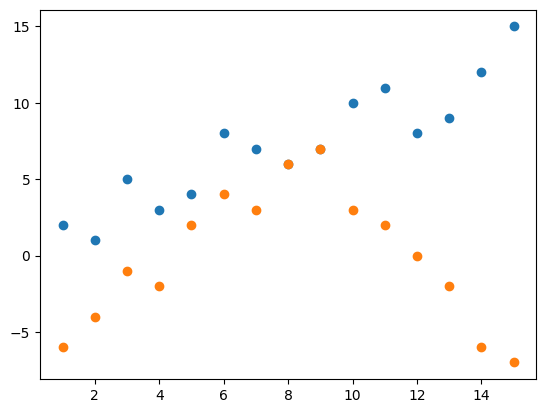

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x = np.arange(1, 16)
y1 = [2, 1, 5, 3, 4, 8, 7, 6, 7, 10, 11, 8, 9, 12, 15]
y2 = [-6, -4, -1, -2, 2, 4, 3, 6, 7, 3, 2, 0, -2, -6, -7]

%matplotlib inline

plt.scatter(x, y1)
plt.scatter(x, y2)

In [2]:
X = np.vstack([x, np.ones(len(x))])
X = X.T

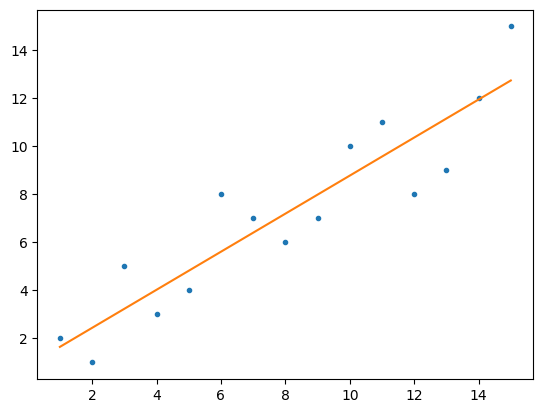

In [3]:
lsq = np.linalg.lstsq(X, y1, rcond = None)
a, b = lsq[0]

%matplotlib inline

plt.plot(x, y1, ".")
plt.plot(x, a*x + b)

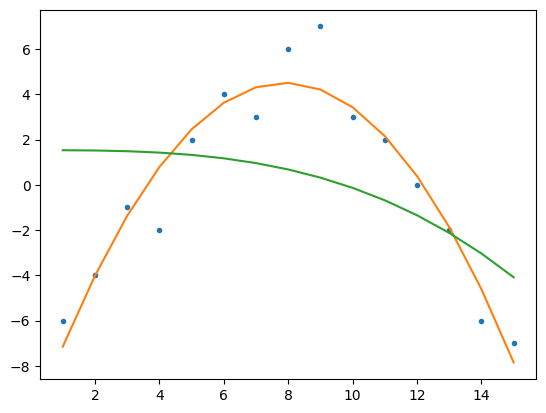

In [22]:
def f(x, a, b, c):
    return a * x**2 + b * x + c
(a, b, c), _ = curve_fit(f, x, y2)

def f2(x, d, p):
    return d * x**3 + p
(d, p), _ = curve_fit(f2, x, y2)

%matplotlib inline

plt.plot(x, y2, ".")
plt.plot(x, f(x, a, b, c))
plt.plot(x, f2(x, d, p))

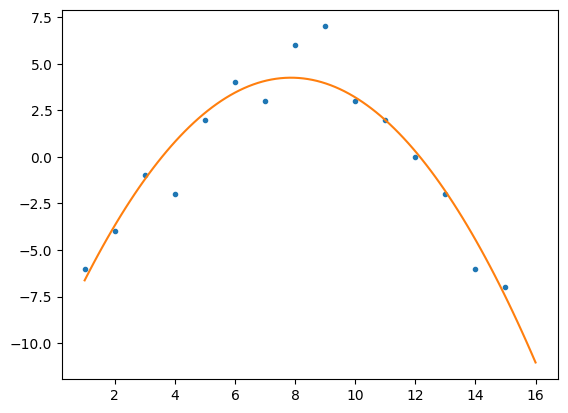

In [40]:
x_m = x[:, np.newaxis]
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(x_m, y2)

x_long = np.linspace(1, 16, 100)[:, np.newaxis]
y_p = model.predict(x_long)

%matplotlib inline

plt.plot(x, y2, ".")
plt.plot(x_long, y_p)